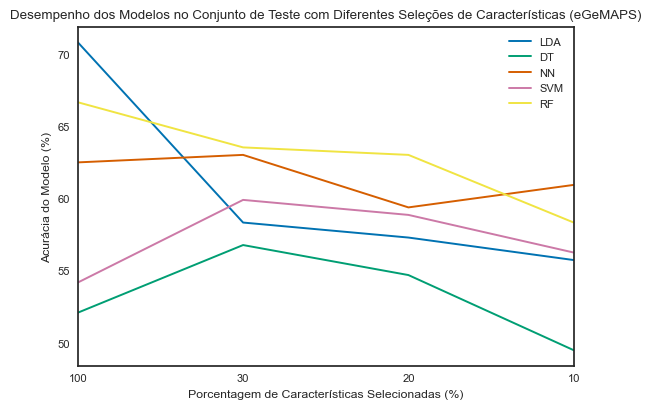

In [23]:
import matplotlib.pyplot as plt

# Definir as porcentagens de características
percentages = [0, 10, 20, 30]

# Criar um dicionário para armazenar os resultados de cada modelo
model_results = { #emobase
    "LDA": [60.42, 64.06, 58.32, 53.12],
    "DT":  [41.67, 51.56, 49.48, 54.17],
    "NN":  [66.67, 67.19, 67.71, 71.36],
    "SVM": [72.92, 70.31, 65.63, 68.23],
    "RF":  [62.50, 62.50, 63.54, 63.54],
}

model_results = { #ComParE
    "LDA": [60.42, 65.63, 66.15, 67.19],
    "DT":  [50.00, 48.96, 46.88, 42.19],
    "NN":  [60.42, 63.02, 66.15, 66.15],
    "SVM": [64.58, 64.58, 66.67, 64.06],
    "RF":  [60.42, 62.50, 63.54, 66.15],
}

model_results = { #eGeMAPS
    "LDA": [70.83, 58.33, 57.29, 55.73],
    "DT":  [52.08, 56.77, 54.69, 49.48],
    "NN":  [62.50, 63.02, 59.38, 60.94],
    "SVM": [54.17, 59.90, 58.86, 56.25],
    "RF":  [66.67, 63.54, 63.02, 58.33],
}

# Escolher estilo
plt.style.use("seaborn-v0_8-white")
plt.style.use("seaborn-v0_8-colorblind")
plt.style.use("seaborn-v0_8-paper")

# Criar o gráfico de linhas
for model_name, results in model_results.items():
    plt.plot(percentages, results, label=model_name)

# Definir os valores específicos do eixo X
plt.xticks(percentages, ["100", "30", "20", "10"])

# Ajustar a escala do eixo X
plt.xlim(0, 30)

# Ajustar o espaçamento entre os pontos no eixo X
plt.tick_params(axis='x', which='both')

# Adicionar rótulos aos eixos
plt.xlabel("Porcentagem de Características Selecionadas (%)")
plt.ylabel("Acurácia do Modelo (%)")

# Adicionar legendas
plt.legend()

# Adicionar título
plt.title("Desempenho dos Modelos no Conjunto de Teste com Diferentes Seleções de Características (eGeMAPS)")

# Salvar a figura em alta qualidade
#plt.savefig("out.png", dpi=300, bbox_inches="tight")

# Mostrar o gráfico
plt.show()


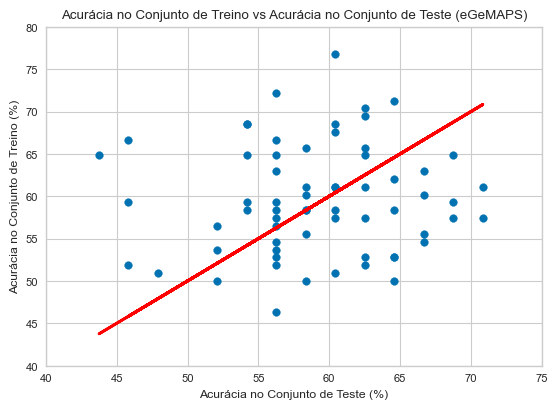

RMSD: 6.354661704970248


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
auto = pd.read_csv('eGeMAPS.csv')

# Estilo
plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use("seaborn-v0_8-colorblind")
plt.style.use("seaborn-v0_8-paper")

# Scatter plot
plt.scatter(auto['% teste'], auto['% treino'])
plt.title('Acurácia no Conjunto de Treino vs Acurácia no Conjunto de Teste (eGeMAPS)')
plt.xlabel('Acurácia no Conjunto de Teste (%)')
plt.ylabel('Acurácia no Conjunto de Treino (%)')

# Fit linear regression
X = auto['% teste'].values.reshape(-1, 1)
y = auto['% treino'].values
plt.plot(X, X, color='red', linewidth=2)  # Adicionando a linha vermelha f(x) = y
plt.axis([40, 75, 40, 80])
plt.savefig("out.png", dpi=300, bbox_inches="tight")
plt.show()

import numpy as np

# Parâmetros da linha
A = 1
B = -1
C = 0

# Calcular a distância para cada ponto
distancias = []
for i in range(len(auto)):
    x = auto['% teste'][i]
    y = auto['% treino'][i]
    distancia = abs(A*x + B*y + C) / np.sqrt(A**2 + B**2)
    distancias.append(distancia)

# Calculando o RMSD
rmsd = np.sqrt(np.mean(np.array(distancias)**2))
print("RMSD:", rmsd)

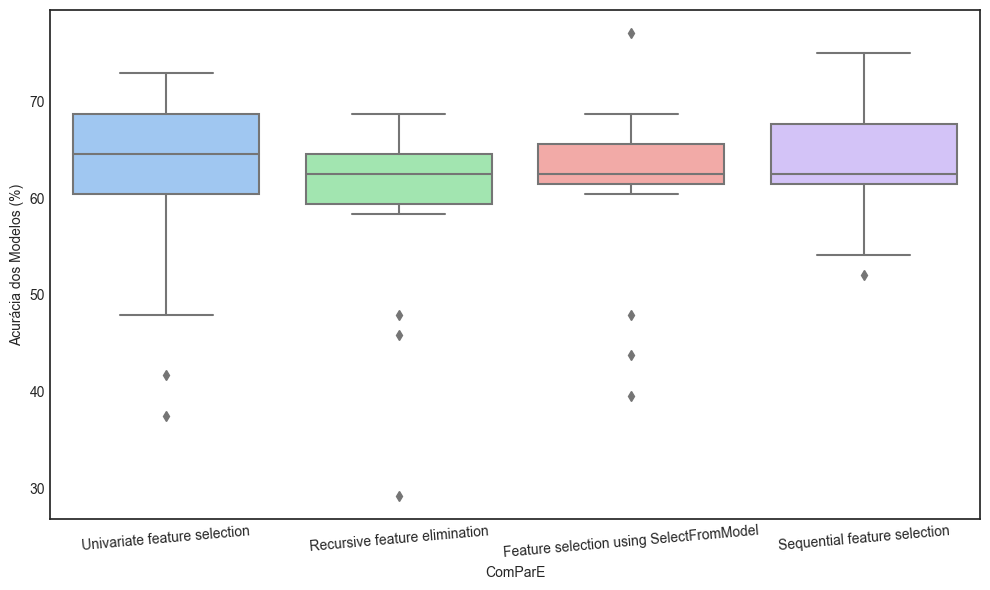

In [7]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('Univariate feature selection',15), 'Acurácia dos Modelos (%)':            [66.67, 41.67, 70.83, 68.75, 64.58, 62.50, 37.50, 72.92, 72.92, 62.50, 62.50, 47.92, 58.33, 68.75, 66.67] })
b = pd.DataFrame({ 'group' : np.repeat('Recursive feature elimination',15), 'Acurácia dos Modelos (%)':           [66.67, 29.17, 62.50, 58.33, 68.75, 64.58, 45.83, 64.58, 62.50, 62.50, 68.75, 47.92, 60.42, 64.58, 60.42] })
c = pd.DataFrame({ 'group' : np.repeat('Feature selection using SelectFromModel',15), 'Acurácia dos Modelos (%)': [66.67, 39.58, 64.58, 66.67, 77.08, 62.50, 43.75, 64.58, 62.50, 62.50, 68.75, 47.92, 64.58, 62.50, 60.42] })
d = pd.DataFrame({ 'group' : np.repeat('Sequential feature selection',15), 'Acurácia dos Modelos (%)':            [68.75, 58.33, 66.67, 62.50, 54.17, 75.00, 60.42, 62.50, 68.75, 66.67, 62.50, 52.08, 68.75, 62.50, 62.50] })
df = pd.concat([a, b, c, d], ignore_index=True)  #ComParE
 
e = pd.DataFrame({ 'group' : np.repeat('Univariate feature selection',15), 'Acurácia dos Modelos (%)':            [52.08, 43.75, 68.75, 62.50, 60.42, 60.42, 37.50, 56.25, 62.50, 58.33, 68.75, 39.56, 64.58, 68.75, 62.50] })
f = pd.DataFrame({ 'group' : np.repeat('Recursive feature elimination',15), 'Acurácia dos Modelos (%)':           [62.50, 52.08, 72.92, 68.75, 62.50, 56.25, 45.83, 62.50, 68.75, 62.50, 56.25, 47.92, 60.42, 70.83, 58.33] })
g = pd.DataFrame({ 'group' : np.repeat('Feature selection using SelectFromModel',15), 'Acurácia dos Modelos (%)': [52.08, 50.00, 72.92, 70.83, 58.33, 64.52, 41.67, 79.17, 70.83, 58.33, 62.50, 50.00, 72.92, 70.83, 58.33] })
h = pd.DataFrame({ 'group' : np.repeat('Sequential feature selection',15), 'Acurácia dos Modelos (%)':            [45.83, 70.83, 70.83, 70.83, 72.92, 52.08, 72.92, 72.92, 60.42, 75.00, 68.75, 68.75, 70.83, 70.83, 70.83] })
df = pd.concat([e, f, g, h], ignore_index=True)  #emobase

i = pd.DataFrame({ 'group' : np.repeat('Univariate feature selection',15), 'Acurácia dos Modelos (%)':            [60.42, 29.17, 62.50, 58.33, 68.75, 54.17, 47.92, 52.08, 62.50, 70.83, 56.25, 45.83, 66.67, 62.50, 58.33] })
j = pd.DataFrame({ 'group' : np.repeat('Recursive feature elimination',15), 'Acurácia dos Modelos (%)':           [56.25, 56.25, 58.33, 60.42, 52.08, 54.17, 64.58, 58.33, 56.25, 56.25, 58.33, 60.42, 56.25, 54.17, 62.50] })
k = pd.DataFrame({ 'group' : np.repeat('Feature selection using SelectFromModel',15), 'Acurácia dos Modelos (%)': [62.50, 56.25, 64.58, 60.42, 56.25, 64.58, 60.42, 66.67, 62.50, 64.58, 60.42, 58.33, 68.75, 66.67, 64.58] })
l = pd.DataFrame({ 'group' : np.repeat('Sequential feature selection',15), 'Acurácia dos Modelos (%)':            [43.75, 56.25, 58.33, 45.83, 56.25, 56.25, 45.83, 60.42, 54.17, 60.42, 58.33, 62.50, 60.42, 56.25, 68.75] })
df = pd.concat([a, b, c, d], ignore_index=True)  #eGeMAPS

# Set the figure size
plt.figure(figsize=(10, 6))

# Create boxplot with rotated x-axis labels
plt.style.use("seaborn-v0_8-white")
plt.style.use("seaborn-v0_8-pastel")
sns.boxplot(x='group', y='Acurácia dos Modelos (%)', data=df)
plt.xticks(rotation=5)  # Rotate x-axis labels
plt.xlabel('ComParE')
plt.savefig("out.png", dpi=300, bbox_inches="tight")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

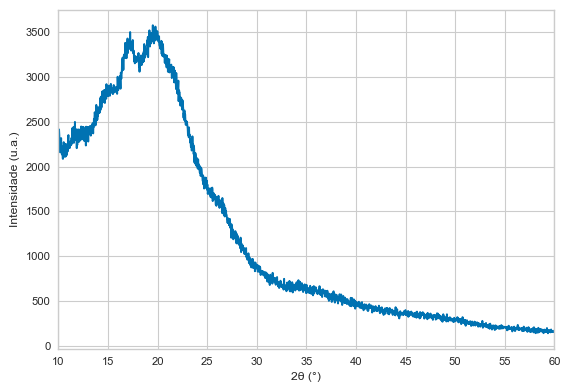

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados do arquivo .xy
with open(r"C:\Users\Lenovo\Downloads\Heveli_Amido.xy", 'r') as file:
    data = file.readlines()

# Extrair os valores de x e y
x = []
y = []
for line in data:
    values = line.split()
    x.append(float(values[0]))
    y.append(float(values[1]))

plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use("seaborn-v0_8-colorblind")
plt.style.use("seaborn-v0_8-paper")

# Plotar a curva
plt.plot(x, y)
plt.xlabel('2θ (°)')
plt.ylabel('Intensidade (u.a.)')

# Definir os limites do eixo x e os marcadores principais e secundários
plt.xlim(10, 60)
plt.xticks(np.arange(10, 61, 5))  # Definir marcadores principais a cada 5 unidades
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))  # Definir marcadores secundários a cada unidade
plt.savefig("out.png", dpi=300, bbox_inches="tight")
plt.grid(True)
plt.show()

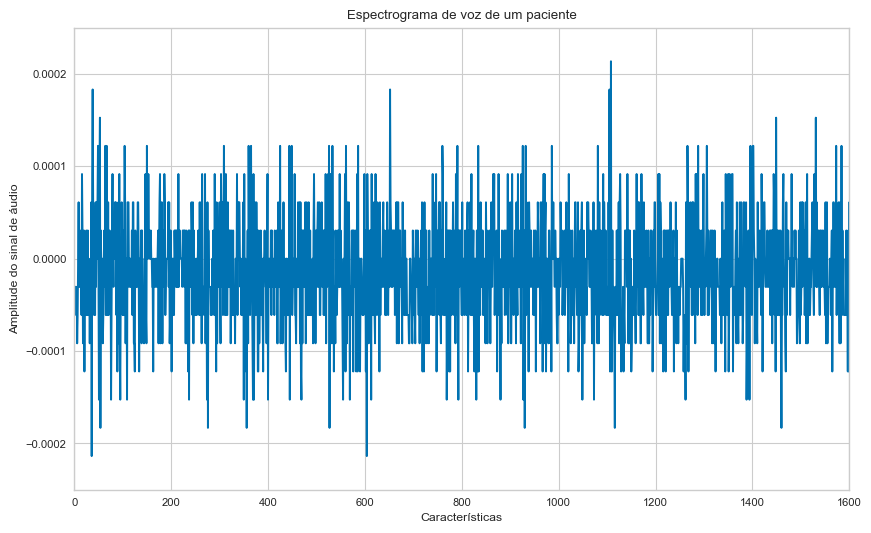

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV para um DataFrame
data = pd.read_csv('4.csv', header=None)

# Extrair os valores do DataFrame
values = data.values

# Plotar as linhas do DataFrame
plt.figure(figsize=(10, 6))  # Definir o tamanho do gráfico
for i in range(len(values)):
    plt.plot(values[i], label=f'Exemplo {i+1}')  # Plotar cada linha como uma série separada

plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use("seaborn-v0_8-colorblind")
plt.style.use("seaborn-v0_8-paper")

plt.xlabel('Características')
plt.ylabel('Amplitude do sinal de áudio')
plt.title('Espectrograma de voz de um paciente')
plt.axis([0, 1600, -0.00025, 0.00025])
plt.savefig("4.png", dpi=300, bbox_inches="tight")
plt.show()


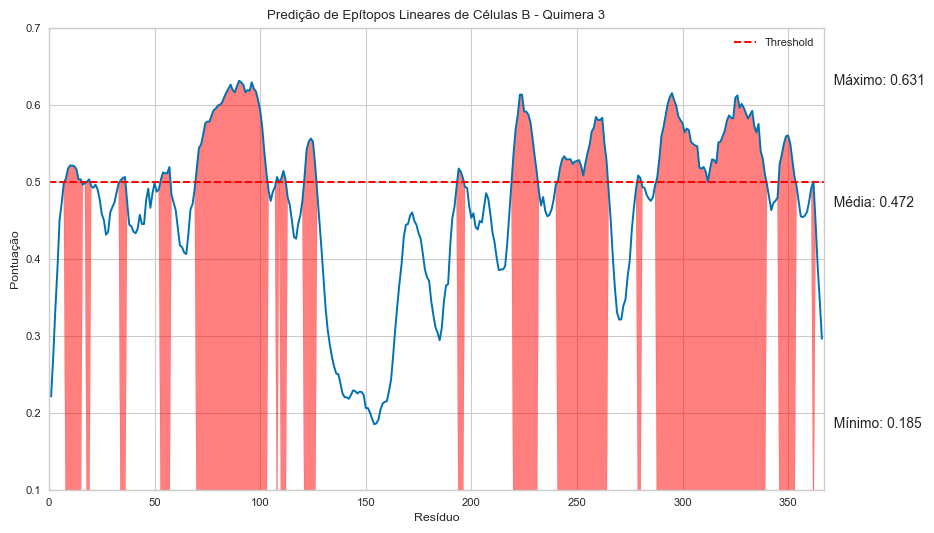

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo o CSV
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Vacinologia Reversa\[03] bepipred_linear_epitope_prediction_results\Quimera_4.csv")

# Definir os valores de x como a terceira coluna do DataFrame
y = df.iloc[:, 2]

# Definir os valores de y como uma contagem simples de 1 para cima
x = range(1, len(df) + 1)

plt.figure(figsize=(10, 6))  # Definir o tamanho do gráfico

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar uma linha pontilhada em y=0.5
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold')

# Preencher a área entre a linha pontilhada e a curva quando a curva passar de 0.5
plt.fill_between(x, y, where=(y >= 0.5), interpolate=True, color='red', alpha=0.5)

# Definir limites personalizados para os eixos x e y
plt.xlim(0, len(df) + 1)  # Definindo o limite do eixo x de 0 ao número total de pontos
plt.ylim(0.1, 0.7)  # Definindo o limite do eixo y de 0.1 a 0.7

# Adicionar as mensagens
plt.annotate('  Média: 0.472', xy=(len(df) + 1, y.mean()), xytext=(len(df) + 2, y.mean()),
             verticalalignment='center')
plt.annotate('  Mínimo: {:.3f}'.format(y.min()), xy=(len(df) + 1, y.min()), xytext=(len(df) + 2, y.min()),
             verticalalignment='center')
plt.annotate('  Máximo: {:.3f}'.format(y.max()), xy=(len(df) + 1, y.max()), xytext=(len(df) + 2, y.max()),
             verticalalignment='center')

# Definir rótulos e título
plt.xlabel('Resíduo')
plt.ylabel('Pontuação')
plt.title('Predição de Epítopos Lineares de Células B - Quimera 3')

# Exibir o gráfico
plt.legend()
# Salvar a figura como uma imagem
plt.savefig("out.png", dpi=300, bbox_inches="tight")
plt.show()

In [1]:
# Sequência de dados
sequencia = "3333334434  3443333332  3333333333  3333344444  4334333334  4333333333  3333333232  2232233333  3333333333  3333323333  3333333333  4343445544  4544444444  4444444444  3333333333  3333333333  3333333333  3333344334  4444444443  3333333434  4443333333  3333334345  5555544444  5344434333  3334455665  4444333323  3333233233  3333333333  3333333333  3333333333  3333333333  3333333223  3355334443  3333444444  4333444333  3333333333  333333"

# Remover espaços em branco e dividir a sequência em listas de números individuais
numeros = sequencia.replace(" ", "")
numeros = [int(numero) for numero in numeros]

# Calcular a média
media = sum(numeros) / len(numeros)

# Imprimir a média
print("Média:", media)


Média: 3.297814207650273
